Выбранный датасет: данные о стоимости акций компаний Activision Blizzard с 2000 по 2003 год. Для этого датасета ***выбрана метрика...***

# **EDA анализ**

In [ ]:
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn

!pip install --upgrade matplotlib > None

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

%matplotlib inline

In [5]:
path = 'AB_share_price_2000-2003.csv'
data_games = pd.read_csv(path)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5868 non-null   object 
 1   Open       5868 non-null   float64
 2   High       5868 non-null   float64
 3   Low        5868 non-null   float64
 4   Close      5868 non-null   float64
 5   Adj Close  5868 non-null   float64
 6   Volume     5868 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 321.0+ KB


In [6]:
data_games.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1.312500,1.375000,1.166667,1.369792,1.214421,7226400
1,2000-01-04,1.343750,1.354167,1.187500,1.328125,1.177480,4262400
2,2000-01-05,1.317708,1.364583,1.312500,1.333333,1.182098,3390000


In [7]:
data_games.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
data_games.shape

(5868, 7)

In [9]:
data_games.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
num_cols = data_games.select_dtypes(exclude='object')
num_cols.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5.868000e+03
mean,27.200409,27.521296,26.843414,27.190898,26.284963,9.430837e+06
std,27.803254,28.072993,27.486007,27.782387,27.696254,8.047555e+06
min,0.471354,0.502604,0.447917,0.471354,0.417890,3.348000e+05
25%,6.545000,6.639610,6.443750,6.538750,5.797083,5.373475e+06
50%,12.350000,12.505000,12.160000,12.330000,11.179425,7.587300e+06
75%,46.275000,47.232501,45.632500,46.480000,45.406249,1.097200e+07
max,103.820000,104.529999,102.550003,103.809998,102.699333,2.251328e+08


In [11]:
data_games[data_games['Open'] == data_games['Open'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
5313,2021-02-16,103.82,104.529999,102.480003,102.959999,101.858429,3773000


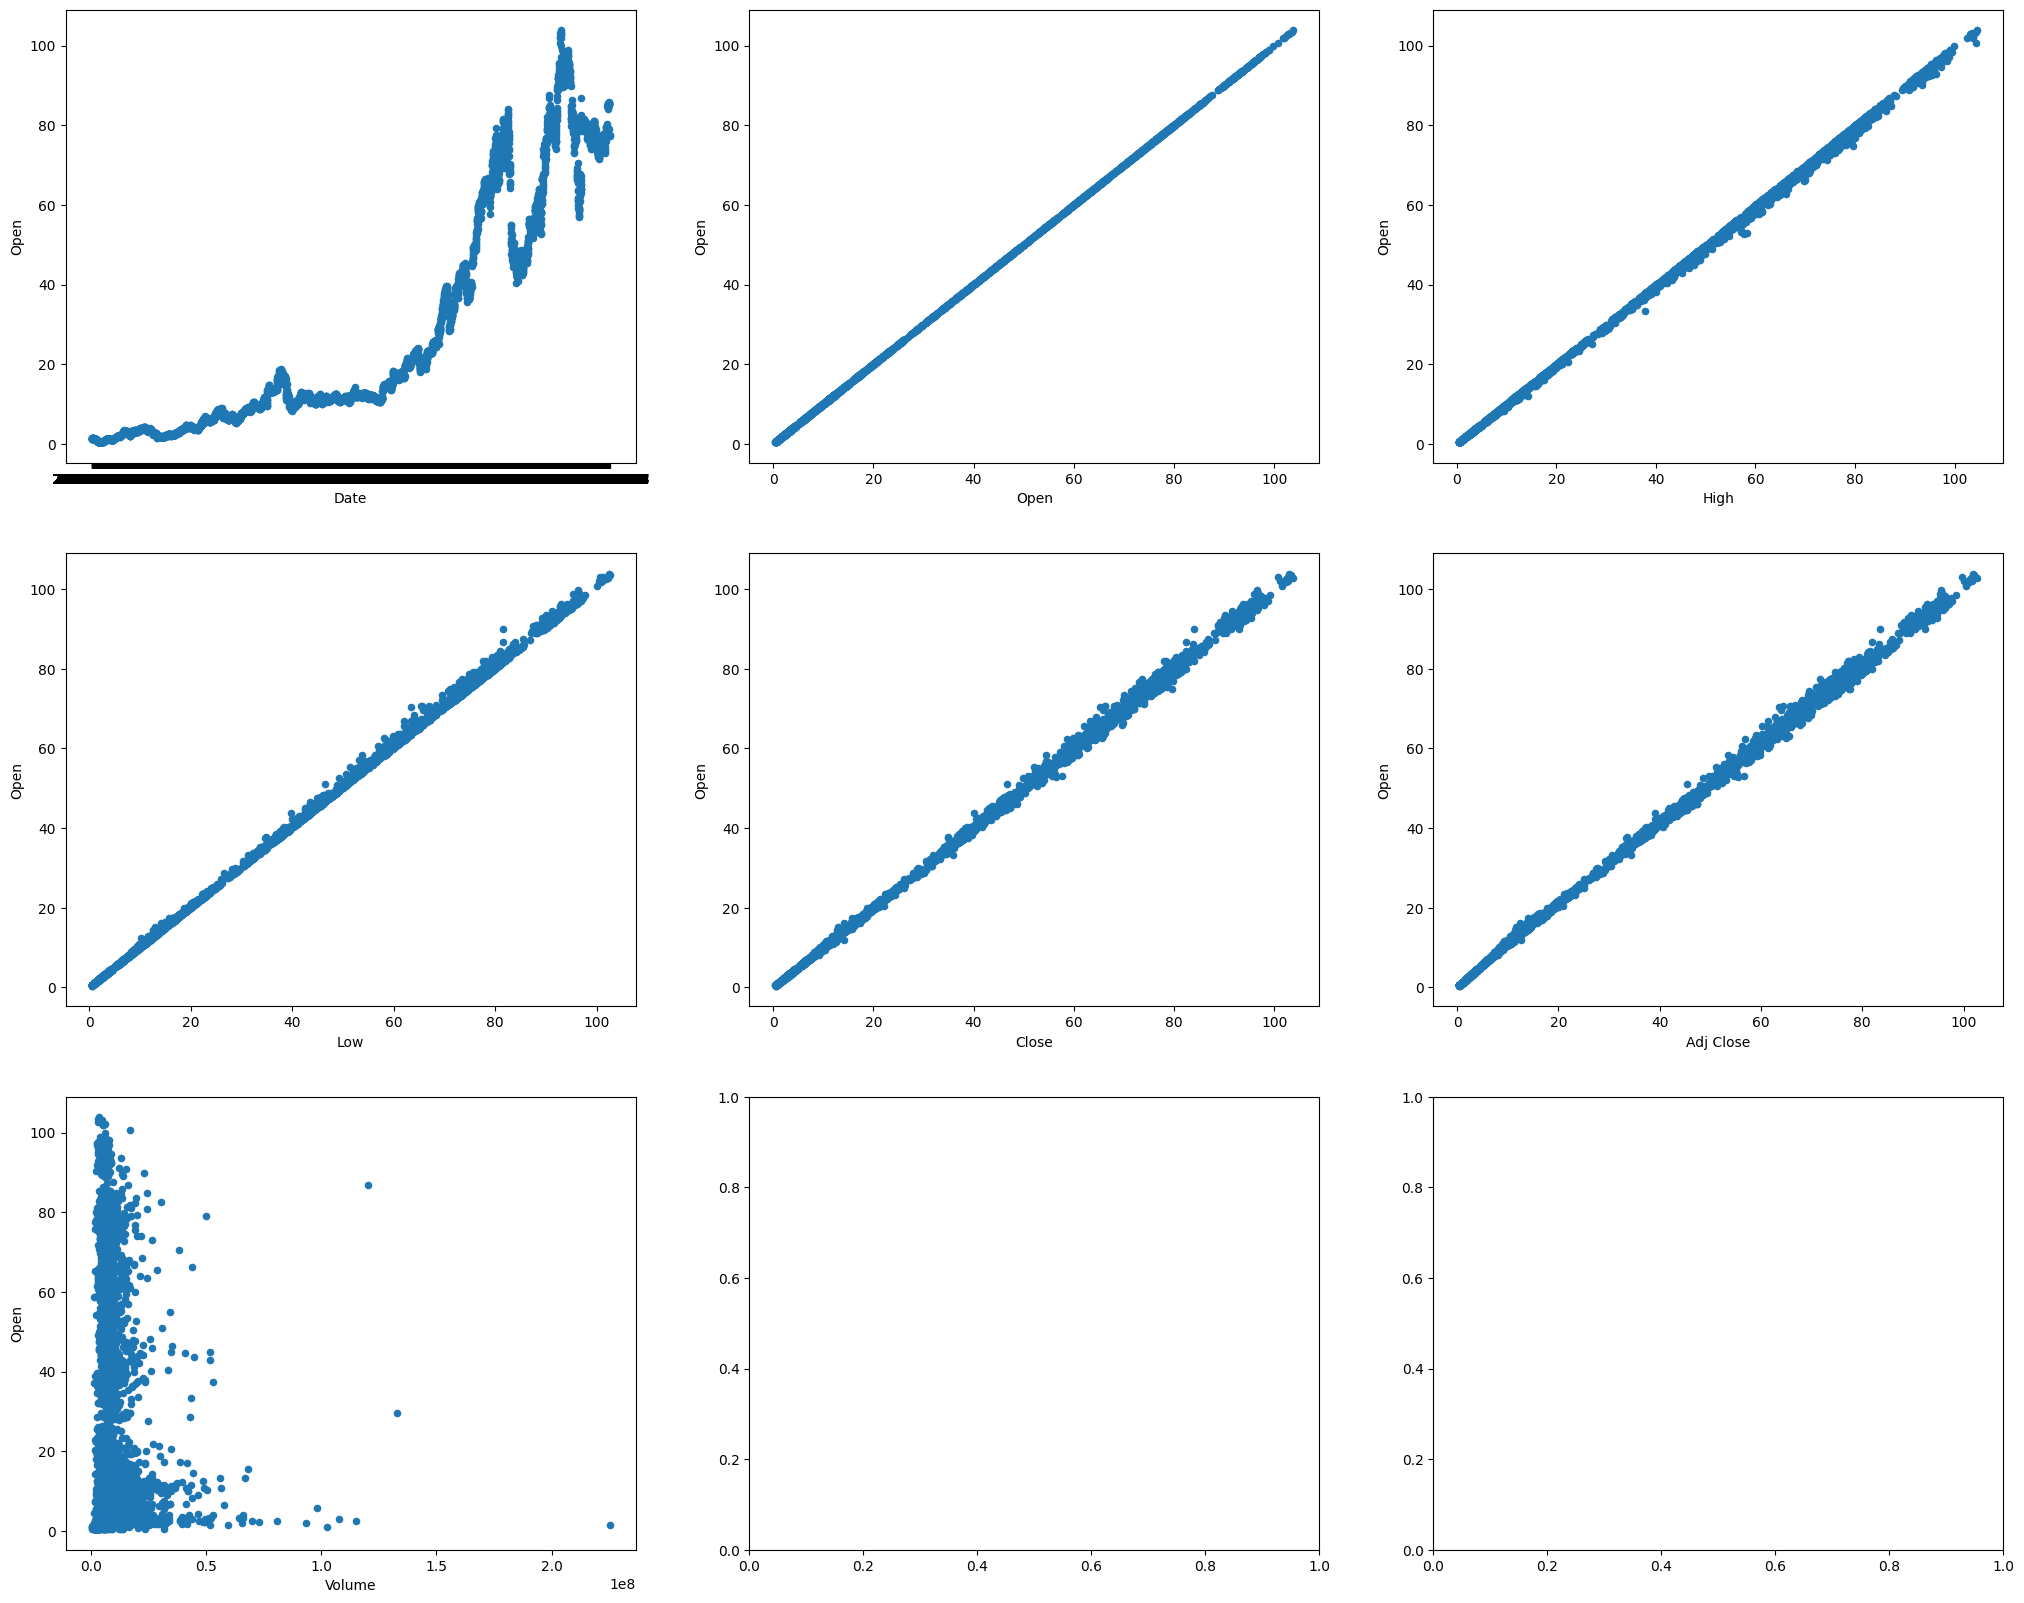

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 20))
for idx, feature in enumerate(data_games.columns):
    data_games.plot(feature, "Open", subplots=True, kind="scatter", ax=axes[idx // 3, idx % 3])

<Axes: xlabel='Open', ylabel='Density'>

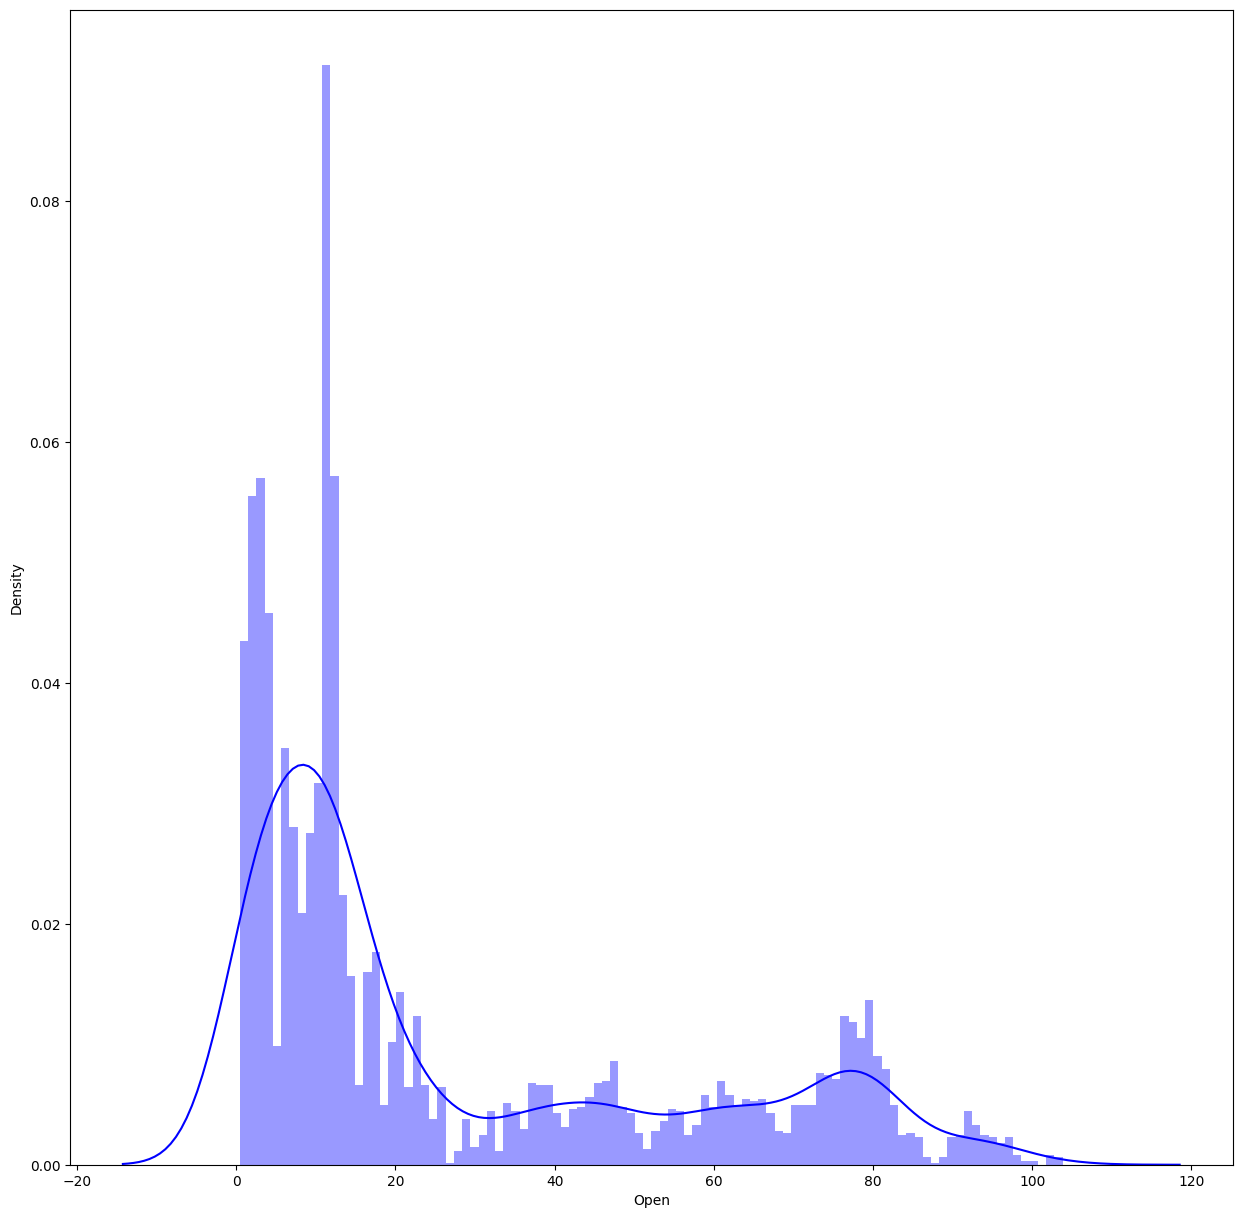

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))
sns.distplot(data_games['Open'], bins=100, color='b')

**Выводы по общей информации**: все значения заполнены, в выборке 5868 элементов, семь столбцов: день торгов, начальная цена акции, самая высокая цена акции, самая низкая цена акции, цена при закрытии, скорректированная цена закрытия, общее число проданных долей. При обписании датафрейма стало видно максимальное значение цены, ниже вывеедн индекс строки, в которой есть это значение, чтобы определить дату этого события (в данном случае, это 2021 год 16 февраля). По точечному анализу (тагретом 'Open') видно, что есть зависимость даты и открываюшей цены акции. Нормальное распределение по "Open" тоже сделала, но пока не знаю, как это интерпретировать. Не успела разобраться, что это знание дает.

# Регрессия

далее...
